In [2]:
from typing import Any
import pandas as pd
from pydantic import BaseModel, Field, field_validator

import logging

log = logging.getLogger(__name__)

class Operation(BaseModel):
    operation: str = Field(...)

    @field_validator("operation")
    def normalize_operation(cls, v):
        operation_mapping = {
            "<": ["lt", "less than", "less"],
            ">": ["gt", "greater than", "greater"],
            "<=": ["lte", "less than or equal to", "less equal"],
            ">=": ["gte", "greater than or equal to", "greater equal"],
            "==": ["eq", "equal to", "equals", "equal"],
            "!=": ["ne", "not equal to", "not equals", "not equal"],
        }

        for op, aliases in operation_mapping.items():
            if v.lower() in aliases + [op]:
                return op

        raise ValueError(f"""Invalid operation: {v}
         allowed Values:
           {operation_mapping}
        """)

In [3]:
Operation(operation="gt")

Operation(operation='>')

In [4]:
!uv pip install polars

Resolved 1 package in 197ms                                                  
Downloaded 1 package in 3.50s1                                      
Installed 1 package in 20ms.21                                      
 + polars==0.20.21


In [5]:
import polars as pl

In [6]:
df = pl.read_csv("../include/x_flow/raw_data/DR_Demo_Bond_trading_RFQ.csv")

In [9]:
splits = pl.read_csv("../include/x_flow/raw_data/search_space.csv")

In [11]:
splits

,target_definition,forecast_distance,feature_derivation,project,project_id
i64,str,i64,i64,str,str
0,"""Regression""",1,1,"""Project(big_tr…","""6465059f6a385c…"
1,"""Regression""",1,5,"""Project(big_tr…","""646507016a385c…"
2,"""Regression""",1,15,"""Project(big_tr…","""64650bedbe7eeb…"
3,"""Regression""",2,1,"""Project(big_tr…","""64651034d067f6…"
4,"""Regression""",2,5,"""Project(big_tr…","""646511a0be7eeb…"
…,…,…,…,…,…
16,"""200""",3,5,"""Project(big_tr…","""646536e6ee2491…"
17,"""200""",3,15,"""Project(big_tr…","""64653924cefe8e…"
18,"""500""",1,1,"""Project(big_tr…","""64653e54cefe8e…"


In [7]:
df.head()

request_id,date,cusip,BidAsk,Mid,yield_to_maturity,years_to_maturity,years_since_issue,is_bench_02y,is_bench_05y,is_bench_10y,is_bench_30y,IssueName,AmountOut,issue_date,Coupon,Currency,maturity_date,counterparty_id,counterparty_type,name,counterparty_aum,ann_account_value_bln,tier,salesperson,salesperson_num_ac_covered,notional_EURm,notional_bps_total_issue,log_notional,resp_bidAsk_norm,response_revenue_EUR,num_brokers,trade_won
i64,str,str,f64,f64,f64,f64,f64,bool,bool,bool,bool,str,f64,str,f64,str,str,str,str,str,f64,f64,str,str,i64,i64,f64,f64,f64,f64,i64,bool
1777,"""04/01/2018""","""D2R8H4AK""",0.0227,102.16795,-0.522589,3.263585,2.507923,false,false,false,false,"""Government of …",20713.79945,"""03/07/2015""",0.25,"""Euro""","""10/04/2021""","""LO057""","""LO""","""Fayetteville I…",81.673308,33.523547,"""C""","""Meghan""",41,29,14.000329,1.462398,2.719329,4028.957313,10,true
1778,"""06/03/2018""","""D20658Z9""",0.1442,128.7033,1.284039,29.005387,4.01651,false,false,false,true,"""Government of …",30525.59919,"""28/02/2014""",2.5,"""Euro""","""08/03/2047""","""LO111""","""LO""","""Knoxville Pens…",114.119618,30.439696,"""C""","""Meghan""",41,208,68.139531,2.318063,12.510871,167553.6102,8,false
1779,"""05/09/2018""","""D206585A""",0.028,100.987,-0.607714,2.661246,3.616775,false,false,false,false,"""Government of …",21803.99942,"""23/01/2015""",0.0,"""Euro""","""04/05/2021""","""LO140""","""LO""","""Cincinnati Cap…",210.929638,46.848707,"""A""","""Kate""",9,135,61.915247,2.130334,2.954119,20139.9049,9,false
1780,"""14/08/2019""","""D2R8H4DM""",0.023,109.0565,-0.721392,9.566247,1.086949,false,false,true,false,"""Government of …",22894.19939,"""13/07/2018""",0.25,"""Euro""","""08/03/2029""","""LO087""","""LO""","""Unalaska Advis…",117.150554,14.189058,"""C""","""William""",15,99,43.242394,1.995635,2.661497,14369.06668,11,false
1781,"""25/04/2018""","""D20659WR""",0.0242,106.5311,-0.492709,1.957604,7.685305,true,false,false,false,"""Government of …",17443.19954,"""18/08/2010""",2.25,"""Euro""","""09/04/2020""","""LO090""","""LO""","""Jackson Trust""",135.431575,50.701944,"""B""","""Louis""",3,228,130.709965,2.357935,2.299022,27923.75113,9,false


In [8]:
df["Currency"].unique()

Currency
str
"""Euro"""


In [43]:
import datarobot as dr
import inspect
import yaml

params_function_mapping = {
    "DatetimePartitioningSpecification": list(inspect.signature(dr.DatetimePartitioningSpecification).parameters.keys()),
    "AdvancedOptions":list(inspect.signature(dr.AdvancedOptions).parameters.keys()),
    "analyze_and_model":list(inspect.signature(dr.Project.analyze_and_model).parameters.keys())}

mapping = {param: dr_class  for (dr_class, params) in params_function_mapping.items() for param in params if param != "self"}

In [45]:
print(yaml.dump(mapping))

accuracy_optimized_mb: AdvancedOptions
advanced_options: analyze_and_model
aggregation_type: DatetimePartitioningSpecification
allow_partial_history_time_series_predictions: DatetimePartitioningSpecification
allowed_pairwise_interaction_groups: AdvancedOptions
autopilot_cluster_list: analyze_and_model
autopilot_data_sampling_method: AdvancedOptions
autopilot_data_selection_method: DatetimePartitioningSpecification
autopilot_with_feature_discovery: AdvancedOptions
backtests: DatetimePartitioningSpecification
bias_mitigation_feature_name: AdvancedOptions
bias_mitigation_technique: AdvancedOptions
blend_best_models: AdvancedOptions
blueprint_threshold: AdvancedOptions
calendar_id: DatetimePartitioningSpecification
class_mapping_aggregation_settings: analyze_and_model
consider_blenders_in_recommendation: AdvancedOptions
credentials: analyze_and_model
cross_series_group_by_columns: DatetimePartitioningSpecification
datetime_partition_column: DatetimePartitioningSpecification
default_monoton

In [1]:
import pandas as pd

In [ ]:
df_df = pd.DataFrame([k.split("/") for k in catalog.load("experiment.external_holdout_no_loop").keys()])
df_df.columns = ["project_id", "partition", "model_id", "data_subset_name"]

df_df["load_function"] = catalog.load("experiment.external_holdout_no_loop").values()

In [7]:
def load_and_index(row):
    # Load the data from the function stored in the row
    loaded_df = row['load_function']()  # Assumption: this function returns a DataFrame
    
    # Create a DataFrame with repeated rows of index data for each entry in the loaded DataFrame
    index_data = pd.DataFrame([row.drop('load_function')] * len(loaded_df), columns=row.index.drop('load_function'))
    
    # Concatenate the index data with the loaded DataFrame
    combined_df = pd.concat([index_data.reset_index(drop=True), loaded_df.reset_index(drop=True)], axis=1)
    
    return combined_df

# Apply the function to each row and concatenate the results into one DataFrame
result_df = pd.concat(df_df.apply(load_and_index, axis=1).tolist(), ignore_index=True)


In [8]:
import seaborn as sns

In [9]:
result_df

,project_id,partition,model_id,data_subset_name,Unnamed: 0,request_id,date,cusip,BidAsk,Mid,...,salesperson_num_ac_covered,notional_EURm,notional_bps_total_issue,log_notional,resp_bidAsk_norm,response_revenue_EUR,num_brokers,trade_won,prediction,partition_id
0,6632cbcc2fb992e99d9db34f,A,6632cc12c9ce4f0234c37f85,external_holdout,7,1784,30/01/2019,D2R8H4DE,0.0220,101.73260,...,9,188,107.778392,2.274158,2.422428,23167.855690,10,False,130.220783,external_holdout
1,6632cbcc2fb992e99d9db34f,A,6632cc12c9ce4f0234c37f85,external_holdout,29,1806,31/05/2019,D20658A3,0.2000,166.94120,...,9,1080,430.714759,3.033424,9.507834,857627.966500,11,True,100.600855,external_holdout
2,6632cbcc2fb992e99d9db34f,A,6632cc12c9ce4f0234c37f85,external_holdout,38,1815,30/11/2017,D206592F,0.1440,132.14240,...,9,328,109.404449,2.515874,10.515570,228010.800500,10,False,171.478958,external_holdout
3,6632cbcc2fb992e99d9db34f,A,6632cc12c9ce4f0234c37f85,external_holdout,60,1837,31/01/2019,D20658Z9,0.2600,144.66040,...,15,191,62.570434,2.281033,17.910996,247664.002500,7,False,100.322335,external_holdout
4,6632cbcc2fb992e99d9db34f,A,6632cc12c9ce4f0234c37f85,external_holdout,66,1843,26/07/2019,D2R8H4CU,0.1178,129.44190,...,9,176,97.841377,2.245513,8.634814,98402.949210,1,True,137.410144,external_holdout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7550,6632cbcc2fb992e99d9db34f,E,6632cc0ff198af212e568824,external_holdout,2041,3842,22/11/2017,D20658T9,0.0244,109.66160,...,27,6,3.057543,0.778151,3.071629,1010.631666,7,True,101.901711,external_holdout
7551,6632cbcc2fb992e99d9db34f,E,6632cc0ff198af212e568824,external_holdout,2052,3853,26/12/2017,D2R8H4CQ,0.0425,100.80235,...,18,40,14.676207,1.602060,5.235662,10557.565770,6,True,100.856682,external_holdout
7552,6632cbcc2fb992e99d9db34f,E,6632cc0ff198af212e568824,external_holdout,2113,3915,26/03/2019,D206584S,0.0224,105.09420,...,16,52,20.738118,1.716003,2.328617,6363.504563,20,False,149.986938,external_holdout
7553,6632cbcc2fb992e99d9db34f,E,6632cc0ff198af212e568824,external_holdout,2122,3924,30/05/2018,D20659WR,0.0370,106.68950,...,21,18,10.319208,1.255273,4.225525,4058.075928,5,False,107.814293,external_holdout


<Axes: xlabel='Mid', ylabel='prediction'>

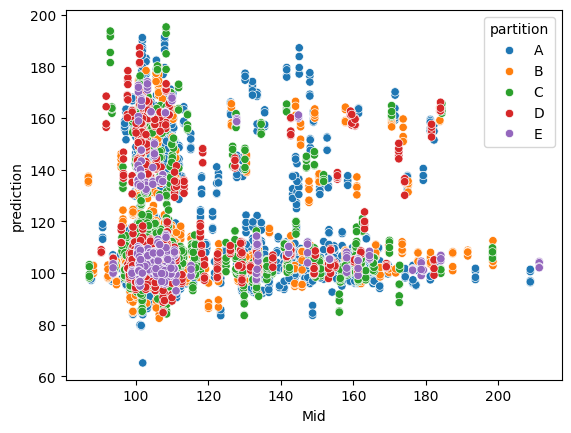

In [10]:
sns.scatterplot(data=result_df, y="prediction", x="Mid", hue="partition",) 




In [17]:
sns.set_theme()

In [20]:
import matplotlib.pylab as plt

In [21]:
sns.set_style("darkgrid")  # adds seaborn style to charts, eg. grid
plt.style.use("dark_background")  # inverts colors to dark theme

In [ ]:
sns.histplot

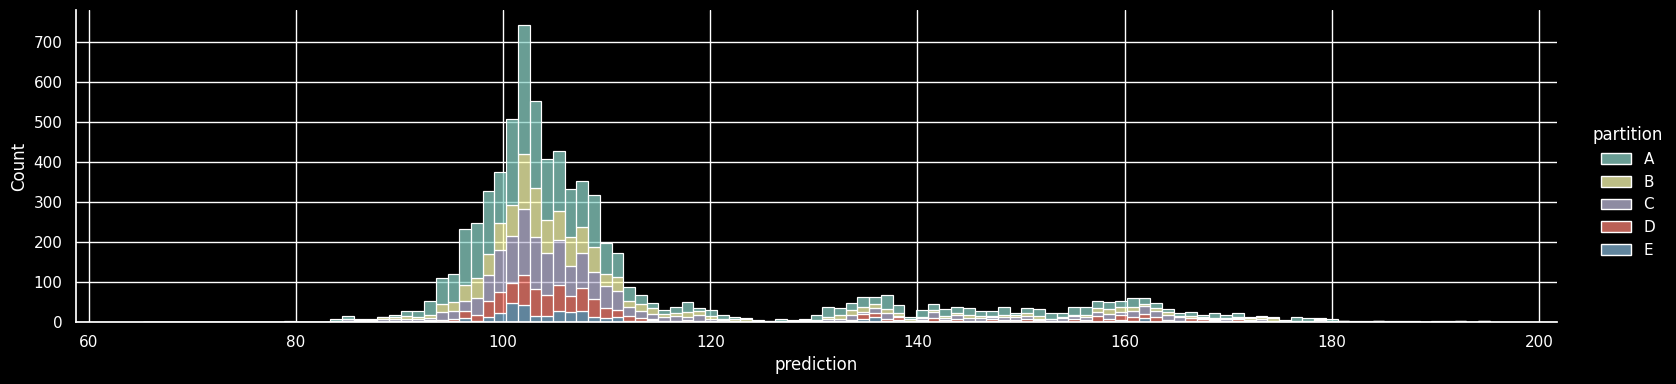

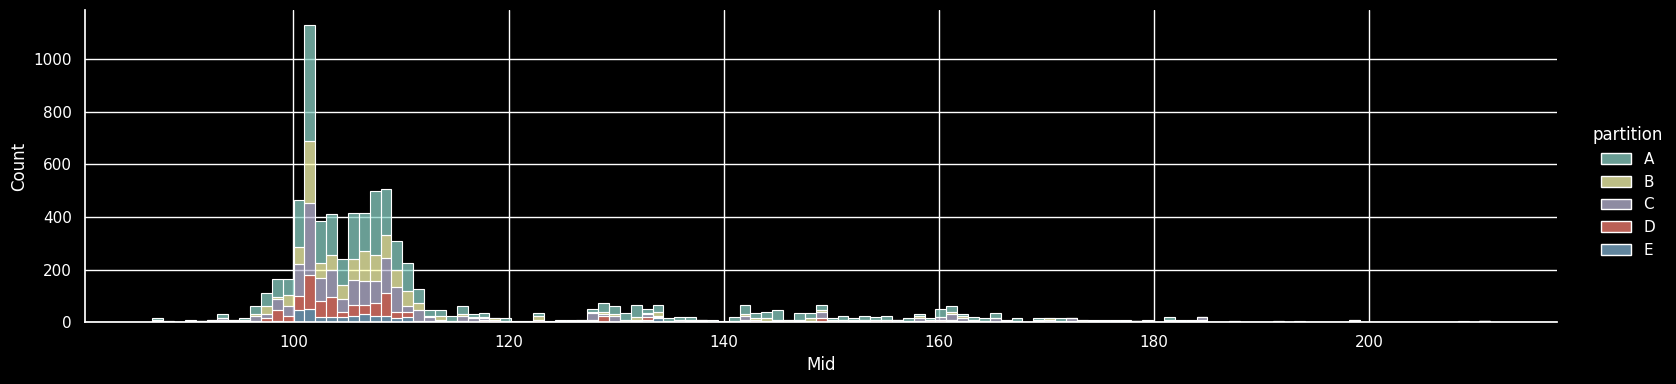

In [26]:
sns.displot(data=result_df, x="prediction", hue="partition", kind="hist", aspect=4, height=4, multiple="stack") 
sns.displot(data=result_df, x="Mid", hue="partition", kind="hist", aspect=4, height=4, multiple="stack") 
